In [1]:
import numpy as np
import sys as sys
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.integrate import simps
%matplotlib widget

In [2]:
def limit_faible(delta, sigma):
    if delta.any() < 0:
        sys.exit("Décalage invalid")
    elif sigma.any() < 0 :
        sys.exit("Écart invalid")
    else:
        
        return np.exp(-(delta**2)/(8*sigma**2))

In [3]:
N = 100 #nombre de points
#L'écart d'un laser pulsé: dans le dégrée temporelle
MIN_E = 1e-9 #L'écart minimal est basé sur un laser femtoseconde
MAX_E = 100e-9 #L'écart maximal est basé sur un laser millisecond

ecart = np.linspace(MIN_E, MAX_E, N)

#Décalage
MIN = MIN_E/100 #basé sur 1/100 de l'écart du laser femtoseconde
MAX = MAX_E*2 #basé sur un séparation de 2 fois un microonde

decal = np.linspace(MIN, MAX, N)

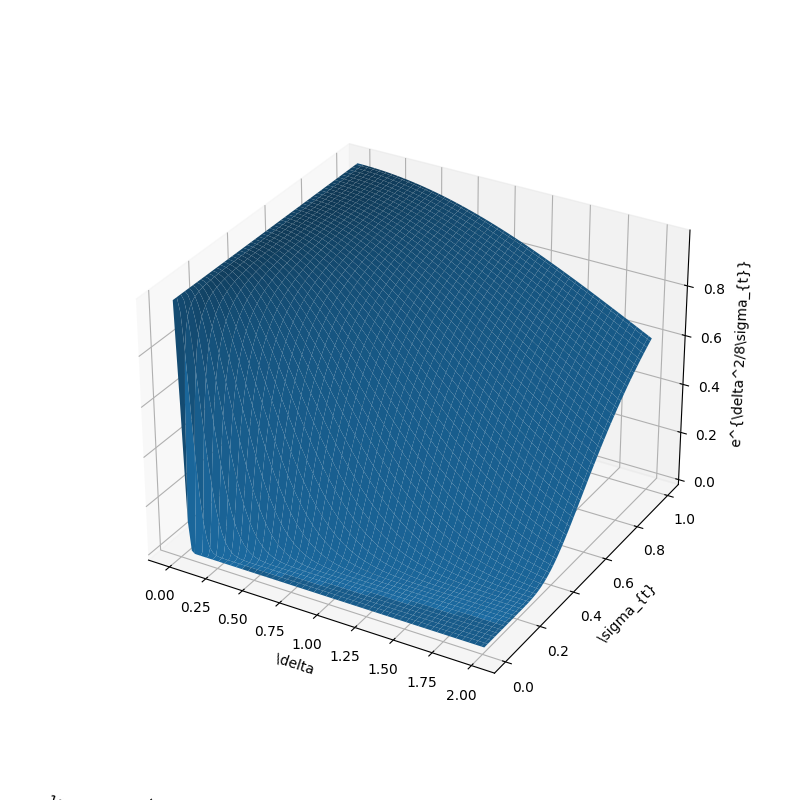

In [4]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

X, Y = np.meshgrid(decal, ecart)
Z = limit_faible(X, Y)

surf = ax.plot_surface(X, Y, Z)

# Set axes label
ax.set_xlabel(r'\delta')
ax.set_ylabel(r'\sigma_{t}')
ax.set_zlabel(r'e^{\delta^2/8\sigma_{t}}')

plt.show()

In [5]:
def limit_faible(delta, sigma):
    if delta.any() < 0:
        sys.exit("Décalage invalid")
    elif sigma < 0 :
        sys.exit("Écart invalid")
    else:
        
        return np.exp(-(delta**2)/(8*sigma**2))

In [6]:
N = 100 #nombre de points

#L'écart d'un laser pulsé: dans le dégrée temporelle
wavelength = 640e-9 #nm 
ecart = 10e-9 #ns (nanoseconde laser)

#Décalage
MIN = ecart/1000 #basé sur 1/1000 de l'écart du laser nanoseconde
MAX = ecart*8 #basé sur un séparation de 2 fois un nanoseconde

decal = np.linspace(MIN, MAX, N)

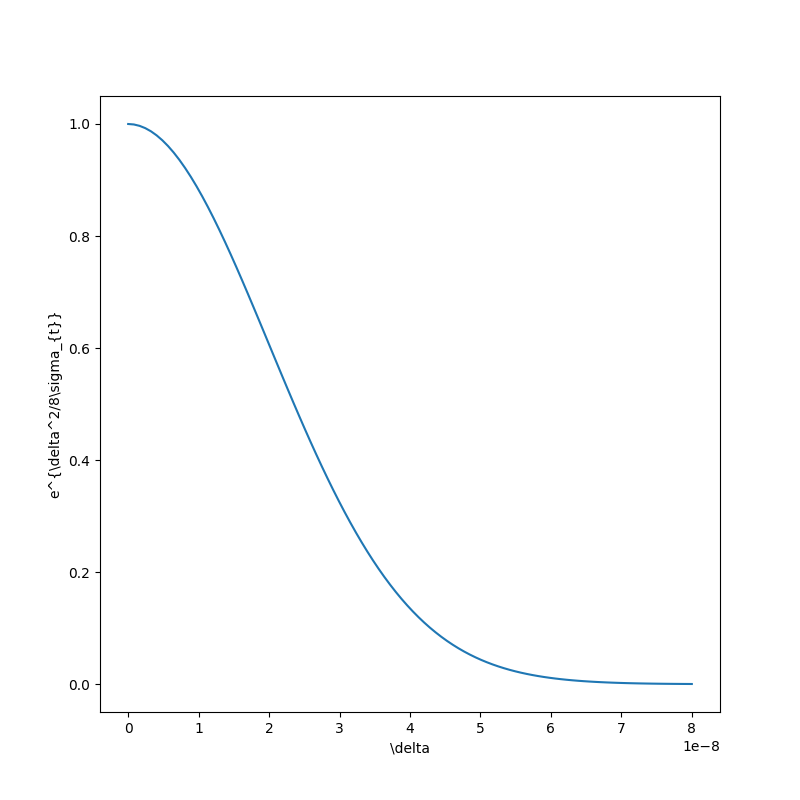

In [7]:
fig = plt.figure(figsize = (8,8))
plt.plot(decal, limit_faible(decal, ecart))
plt.xlabel(r'\delta')
plt.ylabel(r'e^{\delta^2/8\sigma_{t}}')
plt.show()

In [8]:
def gaussien_faible(decal, sigma, t):
    return (1/(sigma*(2*np.pi)**(1/2))**(1/2))*(np.exp(-((t-decal)**2)/(4*sigma**2)))

def gaussien(sigma, t):
    return (1/(sigma*(2*np.pi)**(1/2))**(1/2))*(np.exp(-(t**2)/(4*sigma**2)))

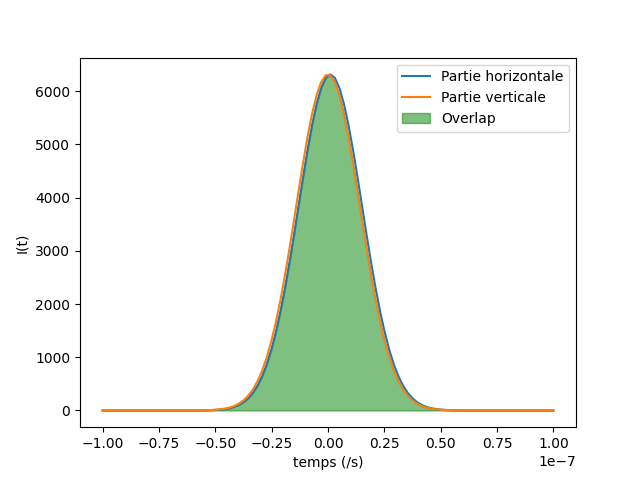

In [9]:
MIN_T = -10e-8
MAX_T = 10e-8
t = np.linspace(MIN_T, MAX_T, N)
h = gaussien_faible(MIN*100, ecart, t)
v = gaussien(ecart, t)

overlap_y = np.minimum(h, v)

fig, ax = plt.subplots()
ax.plot(t, h, label="Partie horizontale")
ax.plot(t, v, label="Partie verticale")
plt.fill_between(t, overlap_y, color='green', alpha=0.5, label='Overlap') 
ax.legend()
plt.xlabel(r'temps (/s)')
plt.ylabel(r'I(t)')
plt.show()

In [10]:
overlap_area = simps(overlap_y, dx=t[N-1] - t[0])
print(overlap_area)

0.021541086490297776
